In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


/var/folders/xf/7sybltyn5qn9587grq_b7l7c0000gn/T/ipykernel_29421/4094721385.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('medical_examination.csv')
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda x: 1 if x > 25 else 0)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [10]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat['total'] = 1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
df_cat
# fig = sns.catplot(x='variable', y='total', data=df_cat, hue='value', kind='bar', col='cardio')



,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


(67260, 14)
(65859, 14)
(64384, 14)
(62784, 14)


TypeError: cannot unpack non-iterable Axes object

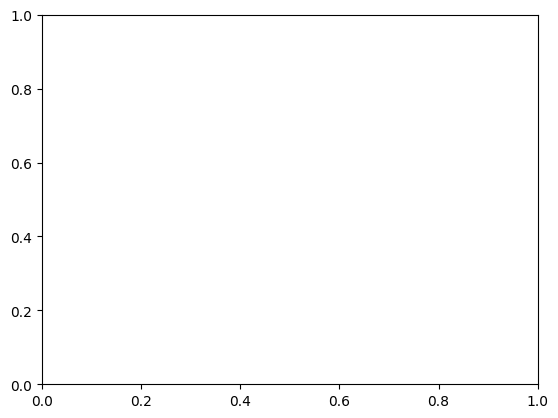

In [17]:
mask = df['ap_lo'] <= df['ap_hi'] 
filter = df[mask]

filter = filter[filter['height'] >= filter['height'].quantile(0.025)]
print(filter.shape)
filter = filter[filter['height'] <= filter['height'].quantile(0.975)]
print(filter.shape)
filter = filter[filter['weight'] >= filter['weight'].quantile(0.025)]
print(filter.shape)
filter = filter[filter['weight'] <= filter['weight'].quantile(0.975)]
print(filter.shape)

  # Calculate correlation matrix
corr_matrix = filter.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure

fig, ax = plt.subplot()
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='icefire', annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.show()